In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist
from keras.models import Model
import os
import cv2
import numpy as np
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
input_folder = '/content/drive/MyDrive/AE/DiffPreds/Blended/'
train_folder = 'BlendedTrain'
test_folder = 'BlendedTest'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

files = os.listdir(input_folder)

num_train = int(len(files) * 0.80)
num_test = int(len(files) * 0.20)

train_files = files[:num_train]
test_files = files[num_train:]

for file_name in train_files:
    src_path = os.path.join(input_folder, file_name)
    dst_path = os.path.join(train_folder, file_name)
    shutil.copy(src_path, dst_path)

for file_name in test_files:
    src_path = os.path.join(input_folder, file_name)
    dst_path = os.path.join(test_folder, file_name)
    shutil.copy(src_path, dst_path)

print("Dataset split into train and test folders.")

Dataset split into train and test folders.


## Here are the links to the dataset and the weights
Link to blended images dataset:
https://drive.google.com/drive/folders/1tqPrGpEhTFXndtbOINpafy51ygMPPZLG?usp=sharing
Link to the weights of this AE:
https://drive.google.com/file/d/1MzYrT4Dav3FhAPXWmok_2d3ZS_IulJ9H/view?usp=sharing


In [ ]:
input_folder = '/content/drive/MyDrive/sen2mtc/clearfr'
train_folder = 'Cleartrain'
test_folder = 'Cleartest'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)


for file_name in tqdm(os.listdir("/content/BlendedTrain/")):
    src_path = os.path.join(input_folder, file_name)
    dst_path = os.path.join(train_folder, file_name)
    shutil.copy(src_path, dst_path)

for file_name in tqdm(os.listdir("/content/BlendedTest/")):
    src_path = os.path.join(input_folder, file_name)
    dst_path = os.path.join(test_folder, file_name)
    shutil.copy(src_path, dst_path)

print("Dataset split into train and test folders.")

100%|██████████| 684/684 [00:01<00:00, 356.80it/s]

Dataset split into train and test folders.


In [ ]:
def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    cv2.cvtColor(array, cv2.COLOR_BGR2RGB)
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 256, 256, 3))
    return array

def display(array1, array2):
    """Displays three random images from each array horizontally stacked, each pair printed one below the other."""
    n = 3  # Display three images
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices]
    images2 = array2[indices]

    # Convert BGR to RGB
    images1_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img.shape[2] == 3 else img for img in images1]
    images2_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img.shape[2] == 3 else img for img in images2]

    # Increase figure size
    plt.figure(figsize=(6, 15))

    for i in range(n):

        stacked_images = np.hstack((images1_rgb[i], images2_rgb[i]))

        plt.imshow(stacked_images)
        plt.axis('off')
        plt.title('Image {}'.format(i + 1))
        plt.show()

In [ ]:
def load_data(data_folder):
    images = []
    names = []
    # Iterate through each subfolder (representing each class)
    for file in tqdm(os.listdir(data_folder), unit="image"):
        image_path = os.path.join(data_folder, file)
        # Iterate through each image in the class folder
                # Read the image and resize it to a fixed size (e.g., 28x28 for MNIST)
        image = cv2.imread(image_path)
        # Append the image and its label to the lists
        images.append(image)
        names.append(file)
        if image is None:
            print("No images found", image_path)
            continue
    # Convert lists to numpy arrays
    images = np.array(images)
    names = np.array(names)
    return images, names


data_folder = '/content/BlendedTrain/'

# Load the data
images_input, images_input_names = load_data(data_folder)

# Print the shapes of the loaded data
print("Images shape:", images_input.shape)

100%|██████████| 2733/2733 [00:04<00:00, 555.01image/s]


Images shape: (2733, 256, 256, 3)


In [ ]:
files = [file for file in os.listdir("/content/drive/MyDrive/sen2mtc/T0/")]

In [ ]:
def load_data(data_folder):
    images = []
    names = []
    # Iterate through each subfolder (representing each class)
    for file in tqdm(files, unit="image"):
        image_path = os.path.join(data_folder, file)
        # Iterate through each image in the class folder
                # Read the image and resize it to a fixed size (e.g., 28x28 for MNIST)
        image = cv2.imread(image_path)
        # Append the image and its label to the lists
        images.append(image)
        names.append(file)
        if image is None:
            print("No images found", image_path)
            continue
    # Convert lists to numpy arrays
    images = np.array(images)
    names = np.array(names)

    return images, names


In [ ]:
data_folder = '/content/Cleartrain/'
images_output, images_output_names = load_data(data_folder)
print("Images shape:", images_output.shape)

100%|██████████| 2733/2733 [00:04<00:00, 670.71image/s]


Images shape: (2733, 256, 256, 3)


In [ ]:
def load_data(data_folder):
    images = []
    names = []
    count = 0
    # Iterate through each subfolder (representing each class)
    for file in tqdm(os.listdir(data_folder), unit="image"):
        image_path = os.path.join(data_folder, file)
        # Iterate through each image in the class folder
                # Read the image and resize it to a fixed size (e.g., 28x28 for MNIST)
        image = cv2.imread(image_path)
        # Append the image and its label to the lists
        images.append(image)
        names.append(file)
        if image is None:
            print("No images found", image_path)
            continue
    # Convert lists to numpy arrays
    images = np.array(images)
    names = np.array(names)
    return images, names

In [ ]:

data_folder = '/content/BlendedTest/'
# Load the data
test_images_input, test_images_names = load_data(data_folder)

print("Images shape:", test_images_input.shape)

100%|██████████| 684/684 [00:00<00:00, 713.49image/s]


Images shape: (684, 256, 256, 3)


In [ ]:
def load_data(data_folder):
    images = []
    names = []
    # Iterate through each subfolder (representing each class)
    for file in tqdm(files[0:301], unit="image"):
        image_path = os.path.join(data_folder, file)
        # Iterate through each image in the class folder
                # Read the image and resize it to a fixed size (e.g., 28x28 for MNIST)
        image = cv2.imread(image_path)
        # Append the image and its label to the lists
        images.append(image)
        names.append(file)
        if image is None:
            print("No images found", image_path)
            continue
    # Convert lists to numpy arrays
    images = np.array(images)
    names = np.array(names)

    return images, names

In [ ]:
data_folder = '/content/Cleartest/'

test_images_output,test_images_names_output = load_data(data_folder)

100%|██████████| 684/684 [00:01<00:00, 669.91image/s]


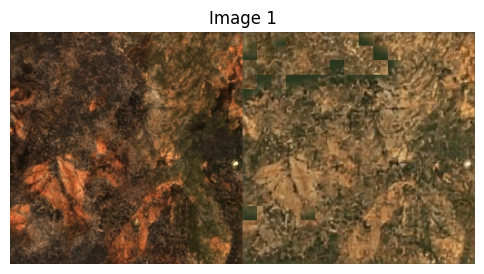

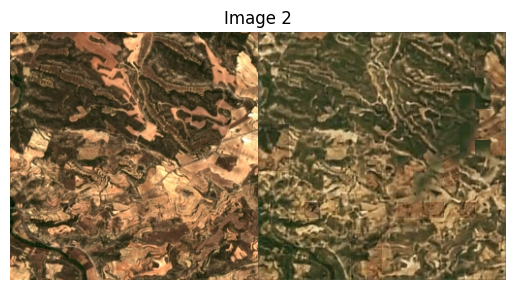

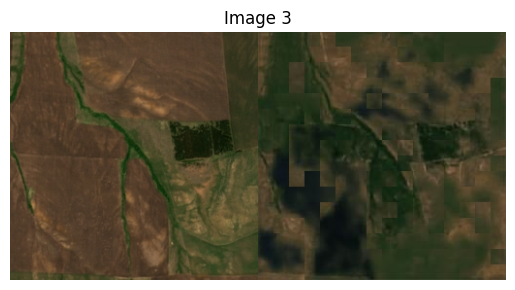

In [ ]:

train_data = preprocess(images_output)
test_data = preprocess(test_images_output)

# Create a copy of the data with added noise
noisy_train_data = preprocess(images_input)
noisy_test_data = preprocess(test_images_input)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [ ]:
def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

In [ ]:


input = layers.Input(shape=(256, 256, 3))

# Encoder
x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# Decoder
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss=SSIMLoss)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 128, 128, 128)     147584

In [ ]:
history = autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=50,
    batch_size=8,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/50
342/342 [==============================] - 59s 167ms/step - loss: 0.3478 - val_loss: 0.3474
Epoch 2/50
342/342 [==============================] - 53s 154ms/step - loss: 0.3462 - val_loss: 0.3459
Epoch 3/50
342/342 [==============================] - 53s 155ms/step - loss: 0.3466 - val_loss: 0.3452
Epoch 4/50
342/342 [==============================] - 53s 155ms/step - loss: 0.3451 - val_loss: 0.3517
Epoch 5/50
342/342 [==============================] - 53s 155ms/step - loss: 0.3449 - val_loss: 0.3437
Epoch 6/50
342/342 [==============================] - 53s 155ms/step - loss: 0.3452 - val_loss: 0.3423
Epoch 7/50
342/342 [==============================] - 53s 155ms/step - loss: 0.3445 - val_loss: 0.3424
Epoch 8/50
342/342 [==============================] - 53s 155ms/step - loss: 0.3436 - val_loss: 0.3409
Epoch 9/50
342/342 [==============================] - 53s 155ms/step - loss: 0.3433 - val_loss: 0.3424
Epoch 10/50
342/342 [==============================] - 53s 155ms/step - l

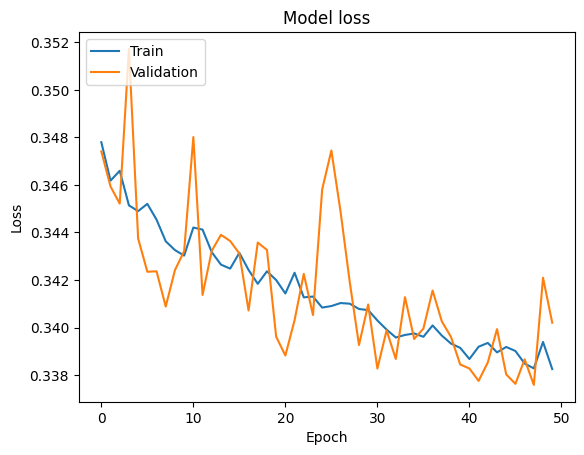

In [ ]:
# Plot training & validation accuracy values
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# autoencoder.save_weights('/content/drive/MyDrive/AE/BLENDINGSSIM.h5')

In [ ]:
autoencoder.load_weights('/content/drive/MyDrive/AE/BLENDINGSSIM.h5')

In [ ]:
import tensorflow as tf

In [ ]:
predictions = autoencoder.predict(noisy_test_data,batch_size=8)

86/86 [==============================] - 270s 3s/step


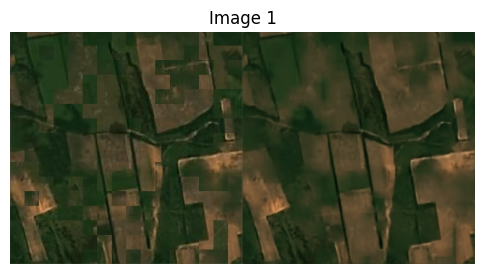

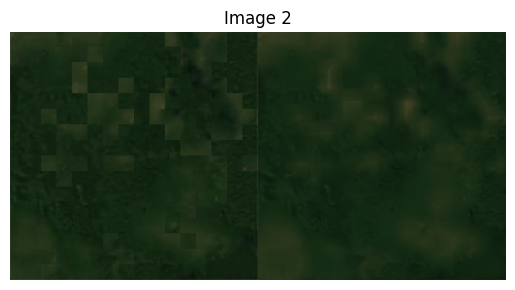

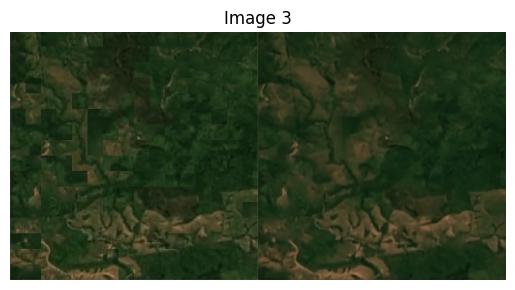

In [ ]:
display(noisy_test_data, predictions)

In [ ]:
def display(array1, array2, array3):
    """Save the blended images from AE"""
    indices = range(len(array1))
    images1 = array1[indices]
    images2 = array2[indices]
    names = array3[indices]

    # Convert BGR to RGB
    images1_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img.shape[2] == 3 else img for img in images1]
    images2_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img.shape[2] == 3 else img for img in images2]

    # Increase figure size
    plt.figure(figsize=(6, 15))

    for i in range(len(array1)):

        plt.imsave(f"/content/drive/MyDrive/AE/DiffPreds/BlendedAEOut/{names[i]}", images2_rgb[i])

In [ ]:
display(noisy_test_data, predictions, test_images_names)

<Figure size 600x1500 with 0 Axes>

In [ ]:
import os

# Path to the folder
folder_path = '/content/drive/MyDrive/AE/DiffPreds/BlendedAEOut'

# Get the list of files in the folder
files = os.listdir(folder_path)

# Get the number of files
num_files = len(files)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 684


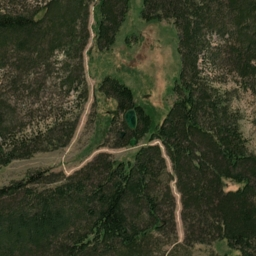

In [ ]:
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/drive/MyDrive/sen2mtc/clearfr/T12TUR_R027_18.jpg')

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

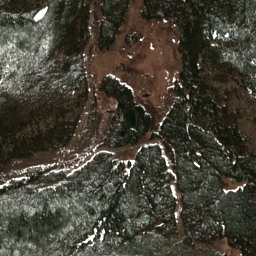

In [ ]:
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/drive/MyDrive/sen2mtc/T0/T12TUR_R027_18.jpg')

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

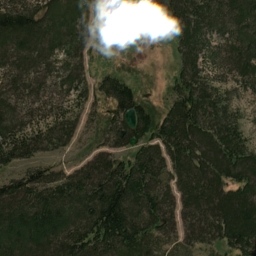

In [ ]:
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/drive/MyDrive/sen2mtc/T1/T12TUR_R027_18.jpg')

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

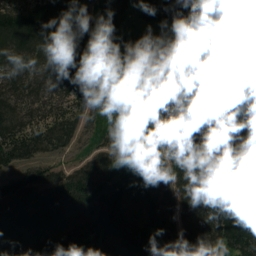

In [ ]:
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/drive/MyDrive/sen2mtc/T2/T12TUR_R027_18.jpg')

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

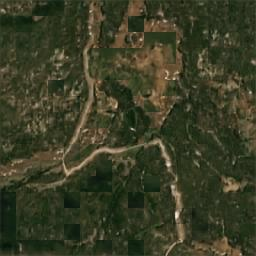

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/drive/MyDrive/AE/DiffPreds/Blended/T12TUR_R027_18.jpg')

# Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#METRICS - Single AE.clear vs t0, clear vs t1, etc.

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
T0_folder = "/content/drive/MyDrive/AE/DiffPreds/T0/"
clear_folder = "/content/drive/MyDrive/sen2mtc/clearfr/"

In [ ]:
def get_normalized(clear, cloudless):
  return np.array(clear) / 255, np.array(cloudless) / 255

In [ ]:
ssim_avg = []
psnr_avg = []
for filename in tqdm(os.listdir(T0_folder)):
    cloudless_path = os.path.join(T0_folder, filename)
    clear_path = os.path.join(clear_folder, filename)  # Fix here

    cloudless = Image.open(cloudless_path).convert("RGB").resize((256, 256))
    clear = Image.open(clear_path).convert("RGB").resize((256, 256))

    c, i = get_normalized(clear, cloudless)
    ssim_avg.append(ssim(c, i, multichannel=True))
    psnr_avg.append(psnr(c, i))

# Display or use the average SSIM and PSNR values
print("Average SSIM AE clear vs T0:", sum(ssim_avg) / len(ssim_avg))
print("Average PSNR AE clear vs T0:", sum(psnr_avg) / len(psnr_avg))

  0%|          | 0/3417 [00:00<?, ?it/s]<ipython-input-32-43094a65abac>:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg.append(ssim(c, i, multichannel=True))
100%|██████████| 3417/3417 [07:13<00:00,  7.88it/s]

Average SSIM: 0.7256301843322653
Average PSNR: 20.13668367779103


In [ ]:
T1_folder = "/content/drive/MyDrive/AE/DiffPreds/T1/"
clear_folder = "/content/drive/MyDrive/sen2mtc/clearfr/"

In [ ]:
def get_normalized(clear, cloudless):
  return np.array(clear) / 255, np.array(cloudless) / 255

In [ ]:
ssim_avg = []
psnr_avg = []
for filename in tqdm(os.listdir(T1_folder)):
    cloudless_path = os.path.join(T1_folder, filename)
    clear_path = os.path.join(clear_folder, filename)  # Fix here

    cloudless = Image.open(cloudless_path).convert("RGB").resize((256, 256))
    clear = Image.open(clear_path).convert("RGB").resize((256, 256))

    c, i = get_normalized(clear, cloudless)
    ssim_avg.append(ssim(c, i, multichannel=True))
    psnr_avg.append(psnr(c, i))

# Display or use the average SSIM and PSNR values
print("Average SSIM AE clear vs T1:", sum(ssim_avg) / len(ssim_avg))
print("Average PSNR AE clear vs T1:", sum(psnr_avg) / len(psnr_avg))

  0%|          | 0/3417 [00:00<?, ?it/s]<ipython-input-37-6635e5289f75>:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg.append(ssim(c, i, multichannel=True))
100%|██████████| 3417/3417 [04:20<00:00, 13.13it/s]

Average SSIM AE clear vs T1: 0.7049668368814708
Average PSNR AE clear vs T1: 19.62359929730352


In [ ]:
T2_folder = "/content/drive/MyDrive/AE/DiffPreds/T2/"
clear_folder = "/content/drive/MyDrive/sen2mtc/clearfr/"

In [ ]:
def get_normalized(clear, cloudless):
  return np.array(clear) / 255, np.array(cloudless) / 255

In [ ]:
ssim_avg = []
psnr_avg = []
for filename in tqdm(os.listdir(T2_folder)):
    cloudless_path = os.path.join(T2_folder, filename)
    clear_path = os.path.join(clear_folder, filename)  # Fix here

    cloudless = Image.open(cloudless_path).convert("RGB").resize((256, 256))
    clear = Image.open(clear_path).convert("RGB").resize((256, 256))

    c, i = get_normalized(clear, cloudless)
    ssim_avg.append(ssim(c, i, multichannel=True))
    psnr_avg.append(psnr(c, i))

# Display or use the average SSIM and PSNR values
print("Average SSIM AE clear vs T2:", sum(ssim_avg) / len(ssim_avg))
print("Average PSNR AE clear vs T2:", sum(psnr_avg) / len(psnr_avg))

  0%|          | 0/3417 [00:00<?, ?it/s]<ipython-input-41-5207bac2129f>:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg.append(ssim(c, i, multichannel=True))
100%|██████████| 3417/3417 [26:42<00:00,  2.13it/s]

Average SSIM AE clear vs T1: 0.7170140237395072
Average PSNR AE clear vs T1: 20.20930870483166


##Just Blended

In [ ]:
Blended_SSIMWin_folder = "/content/drive/MyDrive/AE/DiffPreds/Blended/"
clear_folder = "/content/drive/MyDrive/sen2mtc/clearfr/"

In [ ]:
def get_normalized(clear, cloudless):
  return np.array(clear) / 255, np.array(cloudless) / 255

In [ ]:
ssim_avg = []
psnr_avg = []
for filename in tqdm(os.listdir(Blended_SSIMWin_folder)):
    cloudless_path = os.path.join(Blended_SSIMWin_folder, filename)
    clear_path = os.path.join(clear_folder, filename)  # Fix here

    cloudless = Image.open(cloudless_path).convert("RGB").resize((256, 256))
    clear = Image.open(clear_path).convert("RGB").resize((256, 256))

    c, i = get_normalized(clear, cloudless)
    ssim_avg.append(ssim(c, i, multichannel=True))
    psnr_avg.append(psnr(c, i))

# Display or use the average SSIM and PSNR values
print("Average SSIM AE clear vs Blended:", sum(ssim_avg) / len(ssim_avg))
print("Average PSNR AE clear vs Blended:", sum(psnr_avg) / len(psnr_avg))

  0%|          | 0/3417 [00:00<?, ?it/s]<ipython-input-45-36e465df1560>:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg.append(ssim(c, i, multichannel=True))
100%|██████████| 3417/3417 [03:33<00:00, 15.98it/s]

Average SSIM AE clear vs T1: 0.7296427744767212
Average PSNR AE clear vs T1: 20.486607809458736


##Blended GAN

In [ ]:
Blended_GAN_folder = "/content/drive/MyDrive/AE/DiffPreds/BlendedGANOut/pred/"
clear_folder = "/content/drive/MyDrive/AE/DiffPreds/BlendedGANOut/target/"

In [ ]:
def get_normalized(clear, cloudless):
  return np.array(clear) / 255, np.array(cloudless) / 255

In [ ]:
ssim_avg = []
psnr_avg = []
for filename in tqdm(os.listdir(Blended_GAN_folder)):
    cloudless_path = os.path.join(Blended_GAN_folder, filename)
    clear_path = os.path.join(clear_folder, filename)  # Fix here

    cloudless = Image.open(cloudless_path).convert("RGB").resize((256, 256))
    clear = Image.open(clear_path).convert("RGB").resize((256, 256))

    c, i = get_normalized(clear, cloudless)
    ssim_avg.append(ssim(c, i, multichannel=True))
    psnr_avg.append(psnr(c, i))

# Display or use the average SSIM and PSNR values
print("Average SSIM AE clear vs Blended GAN:", sum(ssim_avg) / len(ssim_avg))
print("Average PSNR AE clear vs Blended GAN:", sum(psnr_avg) / len(psnr_avg))

  0%|          | 0/674 [00:00<?, ?it/s]<ipython-input-4-8bf51c852577>:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg.append(ssim(c, i, multichannel=True))
100%|██████████| 674/674 [10:57<00:00,  1.02it/s]

Average SSIM AE clear vs Blended: 0.6927495503507547
Average PSNR AE clear vs Blended: 21.72488907694417


##Blended AE

In [ ]:
Blended_AE_folder = "/content/drive/MyDrive/AE/DiffPreds/BlendedAEOut/"
clear_folder = "/content/drive/MyDrive/sen2mtc/clearfr/"

In [ ]:
def get_normalized(clear, cloudless):
  return np.array(clear) / 255, np.array(cloudless) / 255

In [ ]:
ssim_avg = []
psnr_avg = []
for filename in tqdm(os.listdir(Blended_AE_folder)):
    cloudless_path = os.path.join(Blended_AE_folder, filename)
    clear_path = os.path.join(clear_folder, filename)  # Fix here

    cloudless = Image.open(cloudless_path).convert("RGB").resize((256, 256))
    clear = Image.open(clear_path).convert("RGB").resize((256, 256))

    c, i = get_normalized(clear, cloudless)
    ssim_avg.append(ssim(c, i, multichannel=True))
    psnr_avg.append(psnr(c, i))

# Display or use the average SSIM and PSNR values
print("Average SSIM AE clear vs Blended:", sum(ssim_avg) / len(ssim_avg))
print("Average PSNR AE clear vs Blended:", sum(psnr_avg) / len(psnr_avg))

  0%|          | 0/684 [00:00<?, ?it/s]<ipython-input-29-4a0ce8c5da56>:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg.append(ssim(c, i, multichannel=True))
100%|██████████| 684/684 [08:41<00:00,  1.31it/s]

Average SSIM AE clear vs Blended: 0.7567228487563913
Average PSNR AE clear vs Blended: 21.022444943057852
